In [2]:
"""Importing Mean Absolute Error

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(predictions, ground_truth)"""

'Importing Mean Absolute Error\n\nfrom sklearn.metrics import mean_absolute_error\n\nMAE = mean_absolute_error(predictions, ground_truth)'

In [3]:
"""Root Mean Squared Error

from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(predictions, ground_truth)"""

'Root Mean Squared Error\n\nfrom sklearn.metrics import mean_squared_error\n\nRMSE = mean_squared_error(predictions, ground_truth)'

In [4]:
# Example 6.01 Evaluating Regression Models of Location Revenue using the MAE and RMSE

import pandas as pd

df = pd.read_csv('Exercise6.01/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [5]:
#import the train_test_split from sklearn
#define the y variable as revenue
# X as num_competitors, median_income, num_loyalty_members, population_density, location_age

from sklearn.model_selection import train_test_split

X = df[['num_competitors',
        'median_income',
        'num_loyalty_members',
        'population_density',
        'location_age']]

y = df['revenue']

In [6]:
#Perform a train-test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [7]:
#import Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)


LinearRegression()

In [8]:
#get the predictiond from the model

predictions = model.predict(X_test)

In [9]:
#Calculate RMSE and MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error

print('RMSE: ' +
     str(mean_squared_error(predictions, y_test)**.5))
print('MAE: ' +
     str(mean_absolute_error(predictions, y_test)))

RMSE: 5133.736391468813
MAE: 4161.387875602788


In [10]:
#rebuild the model after dropping nun_competitors
# create X_train2, X_test2

X_train2 = X_train.drop('num_competitors', axis=1)
X_test2 = X_test.drop('num_competitors', axis=1)

model.fit(X_train2, y_train)

predictions2 = model.predict(X_test2)

In [11]:
#Calculate new RMSE and MAE

print('RMSE: ' + 
     str(mean_squared_error(predictions2, y_test)**.5))
print('MAE: ' + 
     str(mean_absolute_error(predictions2, y_test)))

RMSE: 5702.03000203704
MAE: 4544.416946418697


In [12]:
#the numbers increased when dropping Num_competitors = model became more incorrect.




# End 6.01

In [13]:
#Example 6.02 Recursive Feature Elimination

"""
Import RFE:
from sklearn.feature_selection import RFE

Create an RFE instance and specify how many features you want to select:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

Fit the RFE model:
rfe.fit(X_train, y_train)

Find out which columns were selected by RFE and which were not:

#For Loop
for featureNum in range(X_train.shape[1]):

#if feature was selected
if rfe.support_[featureNum] == True:
print("Feature: {}, Rank: {}"
.format(X_train.columns[featureNum],
rfe.ranking_[featureNum]))

Following Output:
Feature: offer_quality, Rank:1 Feature: offer_discount, Rank 1 Feature: offer_reach Rank: 1

"""


'\nImport RFE:\nfrom sklearn.feature_selection import RFE\n\nCreate an RFE instance and specify how many features you want to select:\nrfe = RFE(estimator=LinearRegression(), n_features_to_select=5)\n\nFit the RFE model:\nrfe.fit(X_train, y_train)\n\nFind out which columns were selected by RFE and which were not:\n\n#For Loop\nfor featureNum in range(X_train.shape[1]):\n\n#if feature was selected\nif rfe.support_[featureNum] == True:\nprint("Feature: {}, Rank: {}"\n.format(X_train.columns[featureNum],\nrfe.ranking_[featureNum]))\n\nFollowing Output:\nFeature: offer_quality, Rank:1 Feature: offer_discount, Rank 1 Feature: offer_reach Rank: 1\n\n'

In [14]:
#import dataset

import pandas as pd

df1 = pd.read_csv('Exercise6.02/20scores.csv')

df1.head()

,revenue,score0,score1,score2,score3,score4,score5,score6,score7,score8,...,score10,score11,score12,score13,score14,score15,score16,score17,score18,score19
0,30698.74,0.067763,1.762772,0.211119,0.619655,-1.586284,0.051320,-0.529940,-0.177908,-0.387431,...,-1.246132,-1.817742,-0.189583,-1.636507,0.088087,0.481573,2.243539,0.330061,-1.019798,-1.409513
1,46813.75,0.943657,-0.696100,3.503075,1.323145,-0.579567,-1.379598,0.013465,1.061996,-0.952645,...,1.115770,0.455824,0.109667,-0.790210,1.876311,0.610918,0.208647,1.505998,0.671251,0.315013
2,39493.35,-0.070838,-1.817580,-0.156724,-0.159741,-1.564338,-0.817489,0.125174,-1.053015,0.181246,...,-0.006912,-0.009129,-0.324959,1.040768,0.375134,-0.127496,1.435406,3.267201,-0.010580,-1.725084
3,48130.55,-0.133306,0.815997,2.261204,0.794839,-0.947440,0.049189,-0.042403,1.657086,-2.870217,...,2.183177,0.364106,0.686530,0.112862,1.840957,-1.003409,1.641141,1.469621,-1.839971,-0.456130
4,35129.09,0.452780,1.529394,0.085364,-0.787245,1.351148,-0.340774,0.354099,-0.319731,-0.776033,...,2.000792,1.035293,-0.719229,-3.073072,-0.078145,-0.154752,0.117198,0.226051,-1.447333,0.463009


In [15]:
#extract target variable(y) and predictor variable(x)
x_cols = df1.columns[1:]
X = df1[x_cols]

y = df1['revenue']

In [16]:
#import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10)

In [17]:
#import LinearRegression 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# model coefficient

model.coef_

array([ 3.10465458e+01,  1.35929333e+00, -1.71996170e+01, -4.26396854e+00,
       -4.56514104e+00,  2.71178012e+01,  1.12523398e+01, -9.62768549e+00,
        1.28097189e+01, -3.82102937e+01, -3.92691076e+00, -4.49267755e+00,
        9.12581579e+03,  2.81237962e+01,  1.26722148e+01,  1.99096955e+01,
       -1.73401880e+01,  3.77047162e+03, -7.57356369e+00,  4.99844116e+03])

In [19]:
#Import RFE and select 5 features

from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)

In [20]:
#Train RFE model

rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [21]:
#Print columns that were selected along with thier Ranks

for featureNum in range(X_train.shape[1]):
    if rfe.support_[featureNum]==True:
        print("Feature: {}, Rank: {}"
              .format(X_train.columns[featureNum],
                    rfe.ranking_[featureNum]))

Feature: score0, Rank: 1
Feature: score9, Rank: 1
Feature: score12, Rank: 1
Feature: score17, Rank: 1
Feature: score19, Rank: 1


In [22]:
"""Out of the 5 features selected they were given rank of 1,
meaning all 5 features are equally important. 
"""

'Out of the 5 features selected they were given rank of 1,\nmeaning all 5 features are equally important. \n'

In [23]:
#Create a new reduced data set having only the rfe selected columns

X_train_reduced = X_train[X_train.columns[rfe.support_]]
X_test_reduced = X_test[X_train.columns[rfe.support_]]

In [24]:
#Create a new Lineaer Regression model

rfe_model = LinearRegression()
rfe_model.fit(X_train_reduced, y_train)

LinearRegression()

In [25]:
#Use RMSE to compare original and new simplified model (All features(variables) VS 5 features)

#RMSE using original model
rfe_predictions = model.predict(X_test)
print(mean_squared_error(rfe_predictions, y_test)**.5)


#RMSE using RFE optimized model
rfe_predictions2 = rfe_model.predict(X_test_reduced)
print(mean_squared_error(rfe_predictions2, y_test)**.5)

491.78833768572593
487.61841719866027


In [26]:
""" Although the reduced dataset obtained using RFE has only 5 features, the RMSE is lower than the model using all features
This shows that the it has not lost any predictive power, even though it has been simplified."""

' Although the reduced dataset obtained using RFE has only 5 features, the RMSE is lower than the model using all features\nThis shows that the it has not lost any predictive power, even though it has been simplified.'

# End 6.02

In [27]:
# Example 6.03: Using tree-based regression models to capture non-linear trends

"""Importing Decision Tree Regressor = single tree

from Sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=2)

max_depth = the more the depth the tree is allowed, the more complex a relationship it can model
too high of a depth may cause overfitting"""


"""Random Forests

Dataset -> N # of trees -> Mean -> Prediction

Importing Random Forest

from sklearn.module import RandomForestRegressor

forest_model = RandomForestRegressor(max_depth = 2)



"""

'Random Forests\n\nDataset -> N # of trees -> Mean -> Prediction\n\nImporting Random Forest\n\nfrom sklearn.module import RandomForestRegressor\n\nforest_model = RandomForestRegressor(max_depth = 2)\n\n\n\n'

In [28]:
"""You want to figure out how spending habits change with age of your customers, 
and how well different models can capture this relationship. 

This can help in building age specific website patterns that will recommend different products that suit customers spend level. 
"""

'You want to figure out how spending habits change with age of your customers, \nand how well different models can capture this relationship. \n\nThis can help in building age specific website patterns that will recommend different products that suit customers spend level. \n'

In [29]:
#import dataset

df2 = pd.read_csv('Exercise6.03/age_spend.csv')
df2.head()

,spend,age
0,2725.0,20.0
1,3010.0,38.0
2,2782.0,25.0
3,2809.0,31.0
4,2774.0,54.0


In [30]:
# extract target variable (y) and predictor variable (x)

X = df2[['age']]

y = df2[['spend']]

In [31]:
#import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

In [32]:
#import DecisionTreeRegressor one with max_depth 2 and other with MD=5 

from sklearn.tree import DecisionTreeRegressor

max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [33]:
#import Linear Regression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
#import mean_squared_error

#RMSE on Linear Regression prediction
linear_predictions = model.predict(X_test)
print('Linear Model RMSE: '+
     str(mean_squared_error(linear_predictions, y_test)**.5))

#RMSE on Decision Tree Prediction max_depth 2
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree max depth 2 RMSE: '+
     str(mean_squared_error(max2_tree_predictions, y_test)**.5))

#RMSE on Decision Tree Prediction max_depth 5
max5_tree_predictions = max5_tree_model.predict(X_test)
print('Tree max depth 5 RMSE: '+
     str(mean_squared_error(max5_tree_predictions, y_test)**.5))

Linear Model RMSE: 159.07639273785358
Tree max depth 2 RMSE: 125.1920405443602
Tree max depth 5 RMSE: 109.73376798374653


In [35]:
# Tree max depth 5 has the lowest error


In [36]:
#import matplotlib and create a dataframe with variable called ages to have the models predict

import matplotlib.pyplot as plt
%matplotlib inline

ages = pd.DataFrame({'age':range(18,70)})

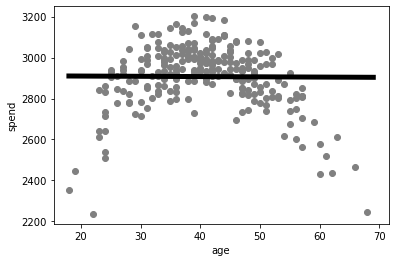

In [37]:
#create a scatter plot to test the models

#Linear Regression Scatterplot:
plt.scatter(X_test.age, y_test,color ='gray')
plt.plot(ages,model.predict(ages),color='k',linewidth=5,
        label = 'Linear Regression')
plt.xlabel('age')
plt.ylabel('spend')
plt.show()

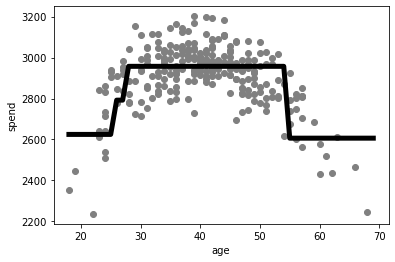

In [38]:
#Decision Tree Regression max_depth 2 Scatterplot:
plt.scatter(X_test.age, y_test,color ='gray')
plt.plot(ages,max2_tree_model.predict(ages),color='k',linewidth=5,
        label = 'Tree with max depth 2')
plt.xlabel('age')
plt.ylabel('spend')
plt.show()

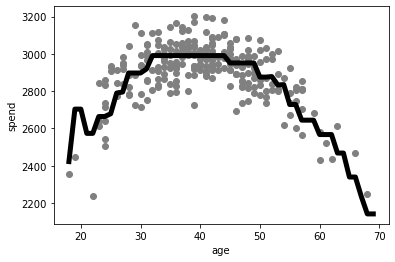

In [39]:
#Decision Tree Regression max_depth 5 Scatterplot:
plt.scatter(X_test.age, y_test,color ='gray')
plt.plot(ages,max5_tree_model.predict(ages),color='k',linewidth=5,
        label = 'Tree with max depth 5')
plt.xlabel('age')
plt.ylabel('spend')
plt.show()

In [40]:
#Create a Random Forest with max_depth 2 & 5
from sklearn.ensemble import RandomForestRegressor

max2_forest_model = RandomForestRegressor(max_depth=2, random_state=10)
max2_forest_model.fit(X_train,y_train)

max5_forest_model = RandomForestRegressor(max_depth=5, random_state=10)
max5_forest_model.fit(X_train,y_train)


/var/folders/ms/t17sw3rj5fv_qhpznf97nw400000gn/T/ipykernel_5529/820964477.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  max2_forest_model.fit(X_train,y_train)
/var/folders/ms/t17sw3rj5fv_qhpznf97nw400000gn/T/ipykernel_5529/820964477.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  max5_forest_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=5, random_state=10)

In [41]:
# calculate RMSE 

#RMSE on Decision Tree Prediction max_depth 2
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Forest max depth 2 RMSE: '+
     str(mean_squared_error(max2_forest_predictions, y_test)**.5))

#RMSE on Decision Tree Prediction max_depth 5
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Forest max depth 5 RMSE: '+
     str(mean_squared_error(max5_forest_predictions, y_test)**.5))


Forest max depth 2 RMSE: 116.57417072810561
Forest max depth 5 RMSE: 109.05510027963649


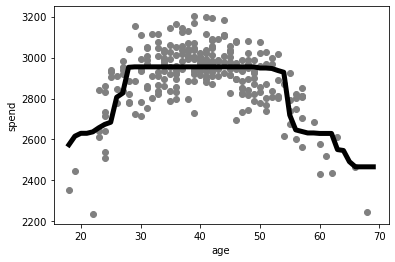

In [42]:
#create Forest md2 scatterplot:
plt.scatter(X_test.age, y_test,color ='gray')
plt.plot(ages,max2_forest_model.predict(ages),color='k',linewidth=5,
        label = 'forest with max depth 5')
plt.xlabel('age')
plt.ylabel('spend')
plt.show()

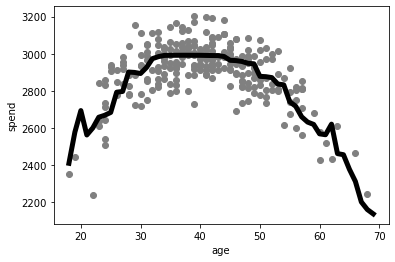

In [43]:
#create Forest md5 scatterplot:
plt.scatter(X_test.age, y_test,color ='gray')
plt.plot(ages,max5_forest_model.predict(ages),color='k',linewidth=5,
        label = 'forest with max depth 5')
plt.xlabel('age')
plt.ylabel('spend')
plt.show()


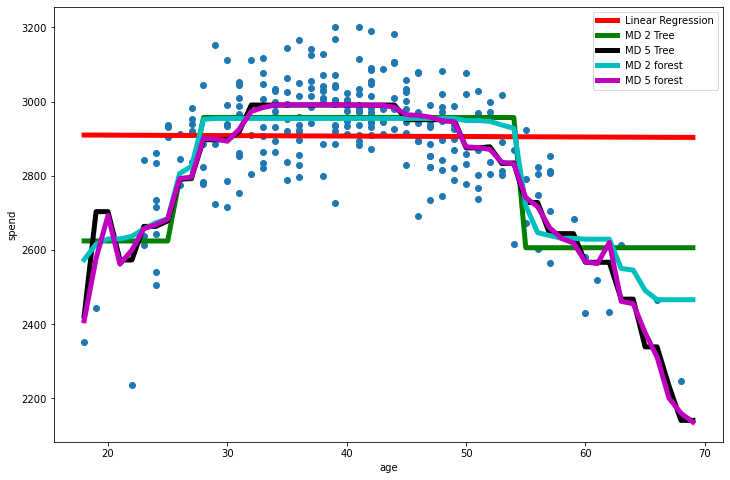

In [44]:
#Create a single scatter plot comparing all models

plt.figure(figsize=(12,8))
plt.scatter(X_test.age,y_test)
plt.plot(ages,model.predict(ages), color='r',linewidth=5,label='Linear Regression')
plt.plot(ages,max2_tree_model.predict(ages),color='g',
        linewidth=5, label='MD 2 Tree')
plt.plot(ages,max5_tree_model.predict(ages),color='k',
        linewidth=5, label='MD 5 Tree')
plt.plot(ages,max2_forest_model.predict(ages),color='c',
        linewidth=5, label='MD 2 forest')
plt.plot(ages,max5_forest_model.predict(ages),color='m',
        linewidth=5, label='MD 5 forest')
plt.legend()
plt.xlabel('age')
plt.ylabel('spend')
plt.show()

# 6.03 End